### SET data ###

In [66]:
### python 3.8.5 ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy import signal
from itertools import chain
from statistics import stdev
from statistics import mean
# import cv2

cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i + 5)
        

### Orginal (8x8) ###

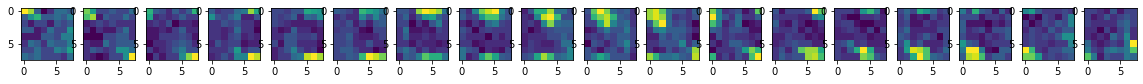

In [67]:
fig, axes = plt.subplots(1,18, figsize=(20,20))

for idx,charts in enumerate(axes):
    charts.imshow(set_np_array[idx], interpolation='none')
    # charts.imshow(set_np_array[idx], interpolation="bilinear", cmap="viridis")

# plt.show()

### Orginal (8x8) filter [[0,-1,0],[-1,15,-1],[0,-1,0]] ###

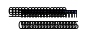

In [68]:
fig, axes = plt.subplots(1,18, figsize=(1,1))
filter_img_data = []

filter_kernel = np.array([[0,-1,0],
                          [-1,15,-1],
                          [0,-1,0]])

for idx,charts in enumerate(axes):
    set_data=charts.imshow(set_np_array[idx], interpolation='bilinear')
    grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
    filter_img_data.append(grad)

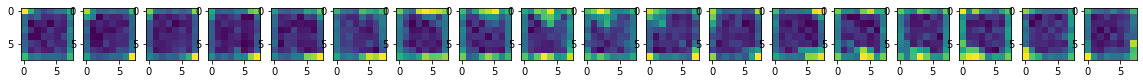

In [69]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
    charts.imshow(filter_img_data[idx], interpolation='none')
    # charts.imshow(set_np_array[idx], interpolation="bilinear", cmap="viridis")

### Orginal (8x8) filter [[0,1,0],[1,5,1],[0,1,0]] ###

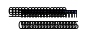

In [70]:
fig, axes = plt.subplots(1,18, figsize=(1,1))
filter_img_data = []

filter_kernel = np.array([[0,1,0],
                          [1,5,1],
                          [0,1,0]])

for idx,charts in enumerate(axes):
    set_data=charts.imshow(set_np_array[idx], interpolation='bilinear')
    grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
    filter_img_data.append(grad)

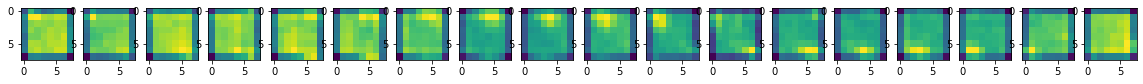

In [71]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
    charts.imshow(filter_img_data[idx], interpolation='none')
    # charts.imshow(set_np_array[idx], interpolation="bilinear", cmap="viridis")

### linear (72x72) ### 

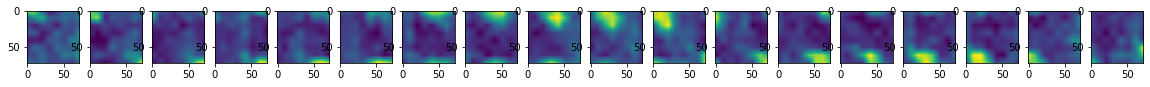

In [72]:
# set_np_array[0]
zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

set_resize_array = []


for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)
    

fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        set_data = charts.imshow(set_resize_array[idx], interpolation='bilinear')
    # print("\n",set_data.get_array())


### Linear (72x72) with filter [[0,-1,0],[-1,15,-1],[0,-1,0]] ###

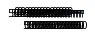

In [73]:
# set_np_array[0]
zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

set_resize_array = []

filter_kernel = np.array([[0,-1,0],
                          [-1,15,-1],
                          [0,-1,0]])


for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

filter_img_data = []

fig, axes = plt.subplots(1,18, figsize=(1,1))
for idx,charts in enumerate(axes):
        set_data = charts.imshow(set_resize_array[idx], interpolation='bilinear')
        # print("\n",set_data.get_array())
        grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
        # print("\n",grad)
        filter_img_data.append(grad)
        # charts.imshow(grad[idx])


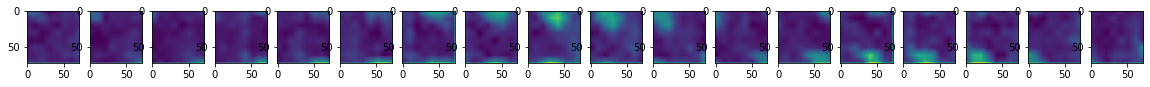

In [74]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(filter_img_data[idx])


### Linear (72x72) with filter [[0,1,0],[1,5,1],[0,1,0]] ###

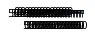

In [75]:
# set_np_array[0]
zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

set_resize_array = []

filter_kernel = np.array([[0,1,0],
                          [1,5,1],
                          [0,1,0]])


for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

filter_img_data = []

fig, axes = plt.subplots(1,18, figsize=(1,1))
for idx,charts in enumerate(axes):
        set_data = charts.imshow(set_resize_array[idx], interpolation='bilinear')
        # print("\n",set_data.get_array())
        grad = signal.convolve2d(set_data.get_array(), filter_kernel, boundary='fill', mode='same')
        # print("\n",grad)
        filter_img_data.append(grad)
        # charts.imshow(grad[idx])


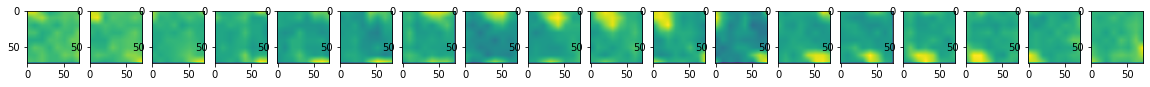

In [76]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(filter_img_data[idx])


### Binary thresholding (8x8) theshold std 25 ###

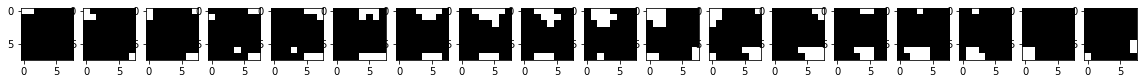

In [77]:
cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i + 5)
        

set_image_bin = []

for frame in set_np_array:
    flatten_list = list(chain.from_iterable(frame))
    # print("\n",flatten_list)
    frame_mean = mean(flatten_list)
    frame_std = stdev(flatten_list)
    maxima = max(flatten_list)
    thres = maxima - 4 * frame_std
    thres = thres if (thres >= 26) else 26

    set_frame = []

    for temp in flatten_list:
        if temp >= thres:
            set_frame.append(255)
        else:
            set_frame.append(0)

    set_np_array_frame = np.array(set_frame)
    set_image_bin.append(set_np_array_frame.reshape(8,8))

fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")


### Binary thresholding (8x8) theshold std 25 with filter ###

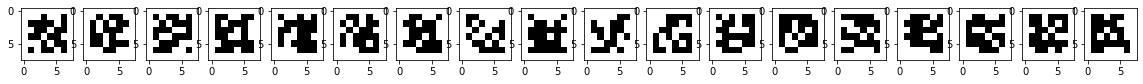

In [78]:
cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i + 5)


filter_img_data = []

filter_kernel = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

for temp in set_np_array:
        grad = signal.convolve2d(temp, filter_kernel, boundary='fill', mode='same')
        filter_img_data.append(grad)

# fig, axes = plt.subplots(1,18, figsize=(20,20))
# for idx,charts in enumerate(axes):
#         charts.imshow(filter_img_data[idx])
        

set_image_bin = []

for frame in filter_img_data:
    flatten_list = list(chain.from_iterable(frame))
    # print("\n",flatten_list)
    frame_mean = mean(flatten_list)
    frame_std = stdev(flatten_list)
    maxima = max(flatten_list)
    thres = maxima - 4 * frame_std
    thres = thres if (thres >= 25) else 25

    set_frame = []

    for temp in flatten_list:
        if temp >= thres:
            set_frame.append(255)
        else:
            set_frame.append(0)

    set_np_array_frame = np.array(set_frame)
    set_image_bin.append(set_np_array_frame.reshape(8,8))

fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")


### Binary thresholding (72x72) theshold std 25 ###

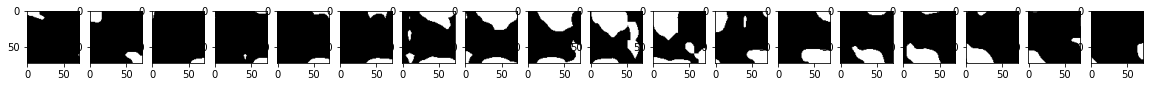

In [79]:
cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i + 5)


set_resize_array = []
set_image_bin = []

zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)

for frame in set_resize_array:
    flatten_list = list(chain.from_iterable(frame))
    frame_mean = mean(flatten_list)
    frame_std = stdev(flatten_list)
    maxima = max(flatten_list)
    thres = maxima - 4 * frame_std
    thres = thres if (thres >= 25) else 25
    
    set_frame = []

    for temp in flatten_list:
        if temp >= thres:
            set_frame.append(255)
        else:
            set_frame.append(0)
    set_np_array = np.array(set_frame)
    set_image_bin.append(set_np_array.reshape(72,72))

fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")


### Binary thresholding (72x72) theshold std 25 with filter ###

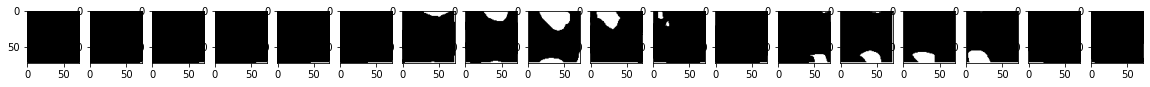

In [80]:
cut_off = 64

textFile = open("./one_subject_entering_frame.txt")
text_file = textFile.read()
array_number = text_file.split(",")

array_number = [int(i) / 256 for i in array_number]

set_np_array = []
dump_array = []
count_cut_off = 1

for i in array_number:
    if count_cut_off > cut_off:
        count_cut_off = 1
        dump_np_array = np.array(dump_array)
        dump_np_array = dump_np_array.reshape(8,8)
        set_np_array.append(dump_np_array)
        dump_array = []
    else:
        count_cut_off = count_cut_off + 1
        dump_array.append(i + 5)


set_resize_array = []
set_image_bin = []

zoom_factor = 9 
zoomed_image = zoom(set_np_array[0], zoom_factor, order=1)

for set_re_size_img in set_np_array:
        zoomed_image = zoom(set_re_size_img, zoom_factor, order=1)
        set_resize_array.append(np.array(zoomed_image))
        # print("\n", zoomed_image)


filter_img_data = []

filter_kernel = np.array([[0,-1,0],
                          [-1,15,-1],
                          [0,-1,0]])

for frame in set_resize_array:
        grad = signal.convolve2d(frame, filter_kernel, boundary='fill', mode='same')
        filter_img_data.append(grad)



for frame in filter_img_data:
    flatten_list = list(chain.from_iterable(frame))
    # set_std_each_frame.append(stdev(flatten_list))
    frame_mean = mean(flatten_list)
    frame_std = stdev(flatten_list)
    maxima = max(flatten_list)
    thres = maxima - 4 * frame_std
    thres = thres if (thres >= 25) else 25
    
    set_frame = []

    for temp in flatten_list:
        if temp >= thres:
            set_frame.append(255)
        else:
            set_frame.append(0)
    set_np_array = np.array(set_frame)
    set_image_bin.append(set_np_array.reshape(72,72))

fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_image_bin[idx], cmap="gray")


### Binary thresholding (72x72) theshold std 25 with filter and using blob 20 pixel ###

In [124]:
set_blob_array_image = []

for image in set_image_bin:
    set_new_img = []
    for frame in image:
        count = 0
        for pixel in frame:
            if pixel == 255:
                count += 1
        
        if count >= 19:
            for set_pixel in frame:
                set_new_img.append(set_pixel)
        else:
            for set_pixel in set_image_bin[0][3]:
                set_new_img.append(set_pixel)
                
    set_np_array = np.array(set_new_img)
    set_blob_array_image.append(set_np_array.reshape(72,72))

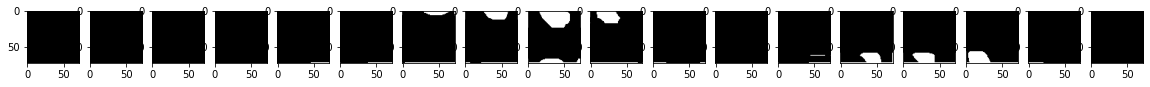

In [126]:
fig, axes = plt.subplots(1,18, figsize=(20,20))
for idx,charts in enumerate(axes):
        charts.imshow(set_blob_array_image[idx], cmap="gray")
